# Machine Learning
Packages for the day

pip install numpy
pip install scipy
pip install scikit-learn
pip install matplotlib
pip install pandas

### Where to start?

a handy graphic for what solution may be right: https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [1]:
#Our Packages
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd

## Unsupervised Learning

What if you are doing more exploratory work? 
What if you want to make your supervised algorithm run more smoothly by reducing the dimensionality of your problem?
What if you want to supplement your algorithm with additional variables?
What if you have some instincts about sub-groups that may exist within your population? 
What if, for whatever reason, you don't have a label you can do supervised learning over?

In [2]:
#our unsupervised packages
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [3]:
#read in our data, subset the data, and scale it
clinical_df = pd.read_csv('https://raw.githubusercontent.com/fredhutchio/R_intro/master/extra/clinical.csv')

numeric_clinical_data = clinical_df.select_dtypes(include=[np.number]).fillna(value=clinical_df.mean()) 
cig_age = numeric_clinical_data[['age_at_diagnosis', 'cigarettes_per_day',]]
scaled = scale(cig_age)
cig_age.loc[:,:] = scaled
cig_age.describe()

C:\Users\whiteau\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\whiteau\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age_at_diagnosis,cigarettes_per_day
count,6.832000e+03,6.832000e+03
mean,-1.083572e-16,-3.135015e-16
std,1.000073e+00,1.000073e+00
min,-3.642226e+00,-3.094297e+00
25%,-6.065989e-01,0.000000e+00
50%,8.603142e-02,0.000000e+00
75%,7.167427e-01,0.000000e+00
max,2.095846e+00,4.466419e+01


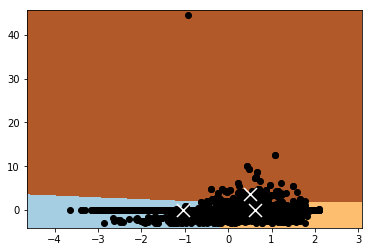

In [7]:
raw_data = cig_age.values
clusters = 3
kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10)
kmeans.fit(raw_data)

# Plot outputs
plt.clf()
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
#X axis is age at diagnosis
x_min, x_max = raw_data[:, 0].min() - 1, raw_data[:, 0].max() + 1
#Y axis is cigarettes per day
y_min, y_max = raw_data[:, 1].min() - 1, raw_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.scatter(raw_data[:, 0], raw_data[:, 1],  color='black')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)


plt.show()

### What's it mean?
our clusters are pretty tightly bunched together. There are a few reasons this could be: cigarettes per day does not meaningfully correlate with age, so they are tightly packed along the most descriptive axis; we need to scale or otherwise clean the data better, so that we can view the results better, etc.

What is another unsupervised way to supplement?

In [5]:
#Let's try Dimensionality Reduction
reduced_data = PCA(n_components=2).fit_transform(scale(numeric_clinical_data))
kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

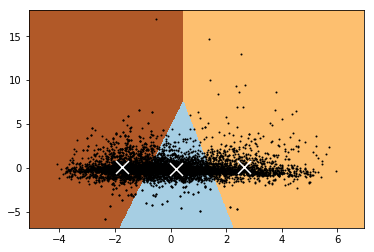

In [6]:
plt.clf()

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)

plt.show()

Notice that we still chose a 2-Dimensional representation of our data, but we derived the 2-dimensions for *ALL* of our available features, and used those instead. The result was a more evenly spread set of clusters